# FINAL PROJECT - SIMULATION

## MEMBERS: CARLOS CARDOSO A - EDITH GUARACA C

### INTEGRATION OF MONTECARLO

Montecarlo's methods encompass a collection of techniques that allow solutions to mathematical or physical problems to be obtained through repeated random tests. In practice, randomized tests are replaced by the results of certain calculations performed with random numbers. The concept of random variable and the transformation of a discrete or continuous random variable will be studied.

### TYPES OF VARIABLES

There are three types of variables that are very necessary in the study of the Monte Carlo method:

* Random variable
* Discrete random variable
* Continuous random variable

### RANDOM NUMBER GENERATOR

There are several formulas to obtain a sequence of random numbers, one of the simplest is the so-called congruence formula: it is an iterative formula, in which the result of one iteration is used in the next.

$x= (a*x+c)$ % m 

### EQUATION TO RESOLVE

$\int \limits _1 ^3 \int \limits _1 ^3 (x^3 + 3x^2y^3-2x^3y^2+y^3) dx dy$

### CODE

Inicia Calculo Integral Doble Montecarlo 

Res:  694.3226054714166 	 con un error estimado de:  686.2759785837428 	 con N:  1
Res:  260.61431318045896 	 con un error estimado de:  136.44915051415424 	 con N:  10
Res:  273.7764340482572 	 con un error estimado de:  37.122055210934406 	 con N:  100
Res:  250.74617861699224 	 con un error estimado de:  11.025783776431258 	 con N:  1000
Res:  252.27347817744283 	 con un error estimado de:  3.506745984166975 	 con N:  10000
Res:  253.91280778874858 	 con un error estimado de:  1.116285826956237 	 con N:  100000
Res:  252.94323295446483 	 con un error estimado de:  0.3524102443249588 	 con N:  1000000

Graficas


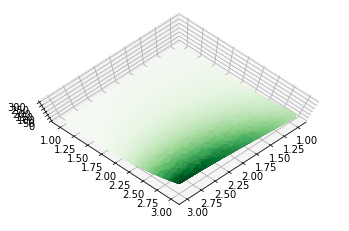

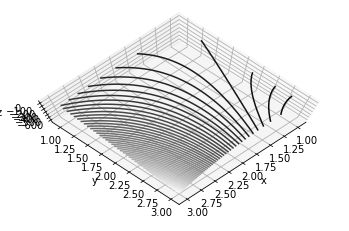

In [7]:
import math
import random
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


class Montecarlo:
    xdata = []
    ydata = []
    zdata = []

    def __init__(self):
        print("Inicia Calculo Integral Doble Montecarlo ")
        print('')
        
    def fun(self, rix, riy, a, b, c, d, bAppend):
        x = ((b - a) * rix + a)
        y = ((d - c) * riy + c)
        res = np.power(x, 3.0) + 3*(np.power(x, 2.0)*np.power(y, 3.0)) - 2*(np.power(x, 3.0) * np.power(y, 2.0)) + np.power(y, 3.0)
        if (bAppend):
            self.xdata.append(x)
            self.ydata.append(y)
            self.zdata.append(res)
        return res

    def integral(self, a, b, c, d, N):
        sumaCuadrada = 0.0
        suma = 0.0
        rix = 0.0
        riy = 0.0
        for i in range(N):
            rix = random.random()
            riy = random.random()
            toSum = self.fun(rix, riy, a, b, c, d, True)
            suma += toSum
            sumaCuadrada += math.pow(toSum, 2.0)
        res = (((b - a) * (d - c)) / N) * suma
        resCuadrado = (1 / N) * sumaCuadrada
        return res, resCuadrado

    def integralError(self, a, b, c, d, N):
        suma = 0.0
        rix = 0.0
        riy = 0.0
        for i in range(N):
            rix = random.random()
            riy = random.random()
            suma += self.fun(rix, riy, a, b, c, d, False)
        res = math.pow((1 / N) * suma, 2.0)
        return res

    def f(self, x, y):
        return x ** 3.0 + 3* x **2.0 * y**3 - 6* x**3 * y **2.0 + y ** 3.0

    def reiniciarArreglos(self):
        self.xdata = []
        self.ydata = []
        self.zdata = []

    def graficar(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.view_init(80, 45)
        ax.scatter3D(self.xdata, self.ydata, self.zdata, c=self.zdata, cmap='Greens');


monte = Montecarlo()
a = 1.0
b = 3.0
c = 1.0
d = 3.0

n = 1
errorCondicion = 0.5
errorObtenido = 100

while (errorObtenido > errorCondicion):
    monte.reiniciarArreglos()
    res, resCuadrado = monte.integral(a, b, c, d, n)

    if ((resCuadrado - res) > 0):
        errorObtenido = (b - a) * (d - c) * math.pow((resCuadrado - res) / n, (1 / 2))
        print("Res: ", res, "\t con un error estimado de: ", errorObtenido, "\t con N: ", n)
    else:
        print("Res: ", res, "\t con un error no estimable")

    if (errorObtenido > errorCondicion):
        n = n * 10

    else:
        monte.graficar()

print('')
print("Graficas")

x = np.linspace(a, b, 40)
y = np.linspace(c, d, 40)

X, Y = np.meshgrid(x, y)
Z = monte.f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(80, 45)
plt.show()

### ANSWER ON THE WOLFRAM ALPHA ONLINE SOFTWARE

![](RES.png)

### VIDEO

* Explanation of the code in the following video <br /><br /> [![Video simulation Monte carlo](https://img.youtube.com/vi/A20p5dRKPwM/0.jpg)](https://youtu.be/A20p5dRKPwM)<br />